## **Analyse multivariée : cadre méthodologique et visualisations**

Ce notebook présente un cadre d'exploration multivariée appliqué au jeu de données `tips`.
L'objectif est d'illustrer, de manière reproductible, le choix des graphiques selon la nature des variables et le type de question statistique posée.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Données et protocole d'analyse


In [3]:
df = sns.load_dataset('tips')
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


Le jeu de données `tips` contient des observations de factures et de pourboires en restauration.

Variables discrètes mobilisées : `sex`, `smoker`, `day`, `time`.
Variables numériques mobilisées : `total_bill`, `tip`, `size`.

Protocole retenu :

1. Identifier la nature des variables (discrète/discrète, discrète/continue, continue/continue).
2. Associer un type de graphique à chaque combinaison.
3. Formuler une interprétation descriptive, sans inférer de causalité.


# Variables discrètes / discrètes

Objectif : décrire la structure des effectifs et des proportions entre catégories.


In [4]:
ct = pd.crosstab(df['smoker'], df['day'], normalize=False)
ct

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,17,15,42,19
No,45,4,45,57


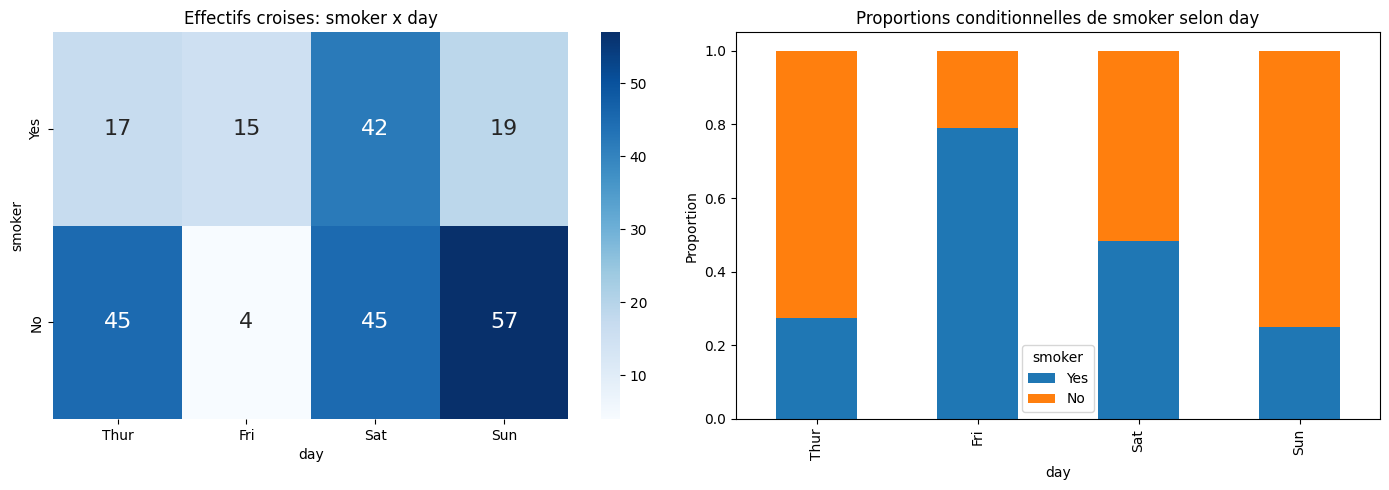

In [32]:
# Visualisation conjointe: effectifs croises et proportions conditionnelles
ct_pct = pd.crosstab(df['day'], df['smoker'], normalize='index')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap des effectifs croises
sns.heatmap(ct, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16}, ax=axes[0])
axes[0].set_title('Effectifs croises: smoker x day')
axes[0].set_xlabel('day')
axes[0].set_ylabel('smoker')

# Diagramme en barres empilees des proportions conditionnelles
ct_pct.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Proportions conditionnelles de smoker selon day')
axes[1].set_ylabel('Proportion')
axes[1].legend(title='smoker')

plt.tight_layout()
plt.show()

Interprétation :

- La table de contingence quantifie les effectifs observés pour chaque combinaison de modalités.
- La heatmap facilite l'identification visuelle des cellules dominantes.
- Le diagramme empilé en proportions permet une comparaison conditionnelle entre groupes.


# Variables discrètes / continues

Objectif : comparer la tendance centrale, la dispersion et la forme de distribution d'une variable numérique selon des groupes.


In [7]:
df.groupby('sex', observed=False)['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


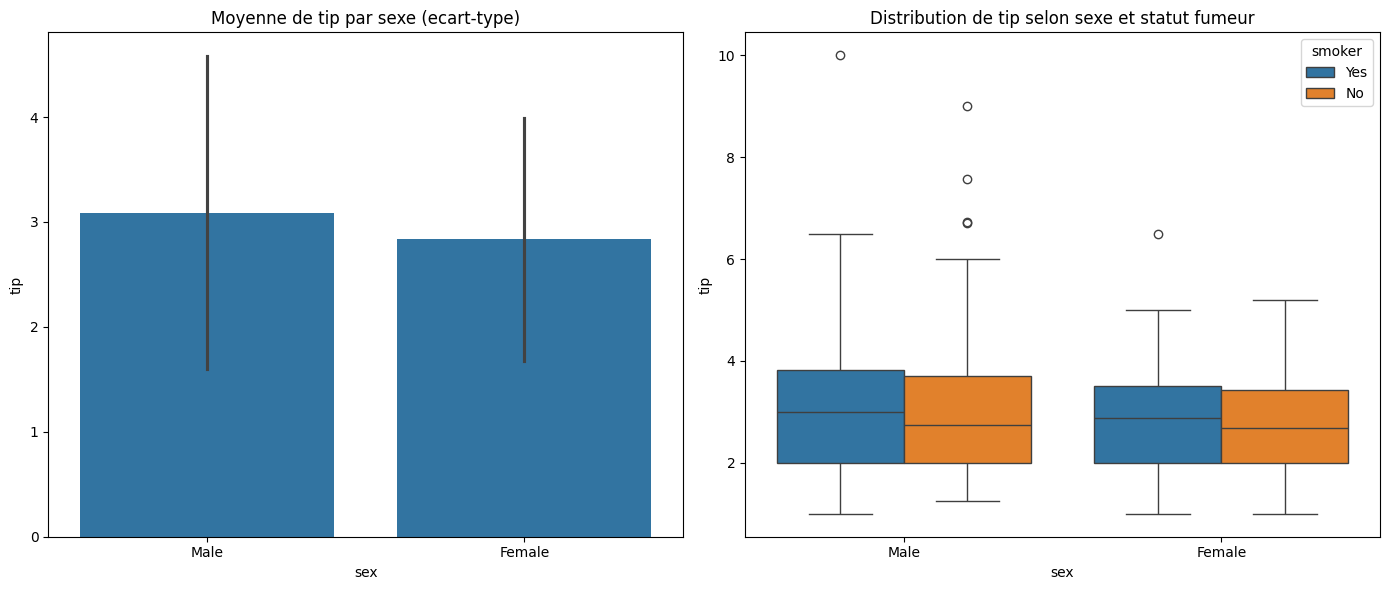

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# barplot avec ecart-type
sns.barplot(data=df, x='sex', y='tip', errorbar='sd', ax=axes[0])
axes[0].set_title('Moyenne de tip par sexe (ecart-type)')

# boxplot avec hue
sns.boxplot(data=df, x='sex', y='tip', hue='smoker', ax=axes[1])
axes[1].set_title('Distribution de tip selon sexe et statut fumeur')
axes[1].legend(title='smoker')

plt.tight_layout()
plt.show()

Interprétation :

- Le barplot renseigne principalement sur la moyenne (avec variabilité).
- Le boxplot permet de comparer la médiane, l'étendue interquartile et les valeurs atypiques.


# Variables continues / continues

Objectif : caractériser l'association entre variables numériques (forme, intensité et linéarité).


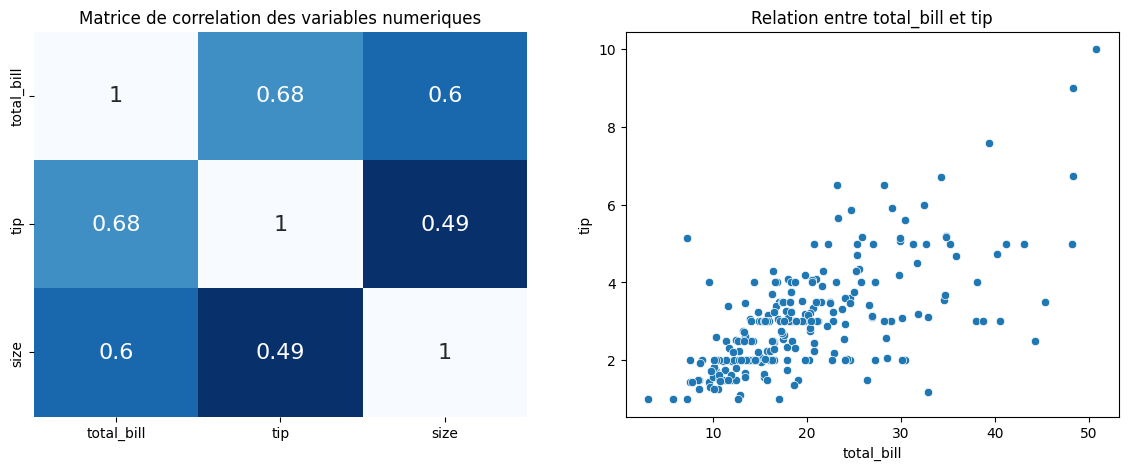

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matrice de correlation
num_cols = ['total_bill', 'tip', 'size']
corr = df[num_cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues_r, cbar=False, ax=axes[0], annot_kws={'size': 16})
axes[0].set_title('Matrice de correlation des variables numeriques')

# Nuage de points
sns.scatterplot(data=df, x='total_bill', y='tip', alpha=1, ax=axes[1])
axes[1].set_title('Relation entre total_bill et tip')

plt.show()

Interprétation :

- Le nuage de points est l'outil de base pour évaluer la forme et l'hétérogénéité de la relation.
- La matrice de corrélation résume les dépendances linéaires globales.

# Conclusion et limites

Cette analyse montre qu'une stratégie de visualisation multivariée efficace repose sur l'adéquation entre :

- la nature des variables,
- la question analytique,
- le niveau de détail attendu.

**Limites de l'approche :**

- les graphiques restent descriptifs et ne remplacent pas un test statistique,
- les relations observées ne constituent pas une preuve causale,
- les résultats dépendent du contexte d'échantillonnage du jeu `tips`.

Prolongement naturel : compléter cette phase exploratoire par des tests d'hypothèse et, si nécessaire, par une modélisation explicative.
